In [1]:
import math
import cv2
import math
from matplotlib import pyplot as plt
import numpy as np
from scipy import ndimage
im_train_label = cv2.imread("week_3_data/test_A_ground_truth.png", cv2.IMREAD_GRAYSCALE)
im_train_label = im_train_label.astype(float)
plt.imshow(im_train_label, cmap="gray")
plt.show()
im_train_input = cv2.imread("week_3_data/test_A_image.png", cv2.IMREAD_GRAYSCALE)
im_train_input = im_train_input.astype(float)
plt.imshow(im_train_input, cmap="gray")
plt.show()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

In [2]:
from feature_based_segmentation import im2col, get_gauss_feat_im
import itertools

im_train_input_feat = get_gauss_feat_im(im_train_input, 2.5)
print(im_train_label.shape)
print(im_train_input_feat.shape)
im_train_label = im_train_label.reshape((im_train_label.shape[0]*im_train_label.shape[1],))
im_train_input_feat = im_train_input_feat.reshape((im_train_input_feat.shape[0]*im_train_input_feat.shape[1],15))
print(im_train_label.shape)
print(im_train_input_feat.shape)

(640, 640)
(640, 640, 15)
(409600,)
(409600, 15)


In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import resample
from sklearn.cluster import KMeans
im_train_input_feat, im_train_label = resample(im_train_input_feat, im_train_label, n_samples=10000, random_state=1)
print(im_train_label.shape)
print(im_train_input_feat.shape)
#neigh = KNeighborsClassifier(n_neighbors=10)
#neigh.fit(im_train_input_feat, im_train_label)
clusters=500
means = KMeans(n_clusters=clusters)
means.fit(im_train_input_feat)

(10000,)
(10000, 15)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=500, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [4]:
predictions = means.predict(im_train_input_feat)
cluster_list = np.zeros([1000,2])
for i, ele in enumerate(predictions):
    label = im_train_label[i]
    if label == 255:
        label = 1
    cluster_list[int(ele)][int(label)] += 1
a_sum = 0
for i,row in enumerate(cluster_list):
    class_0 = row[0]
    class_1 = row[1]
    combined = class_0 + class_1
    if combined != 0:
        cluster_list[i][0] /= combined
        cluster_list[i][1] /= combined
    a_sum += class_0 + class_1
print(a_sum)
print(cluster_list)

10000.0
[[1. 0.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]


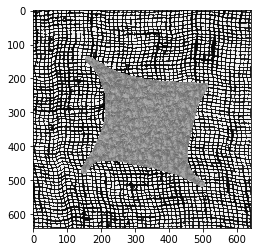

In [5]:
im_test = cv2.imread("week_3_data/train_A_image.png", cv2.IMREAD_GRAYSCALE)
im_test = im_test.astype(float)
plt.imshow(im_test, cmap="gray")
plt.show()
im_test_features = get_gauss_feat_im(im_test, 2.5)
predictions = means.predict(im_test_features.reshape((im_test_features.shape[0]*im_test_features.shape[1],15)))

[0 1 1 ... 1 1 1]


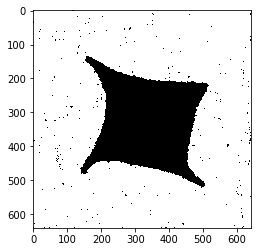

In [6]:
labels=[]
for cluster_pred in predictions:
    if cluster_list[cluster_pred][0] >= cluster_list[cluster_pred][1]:
        labels.append(1)
    else:
        labels.append(0)
labels = np.array(labels)
print(labels)
plt.imshow(labels.reshape((640,640,)), cmap="gray")
plt.show()


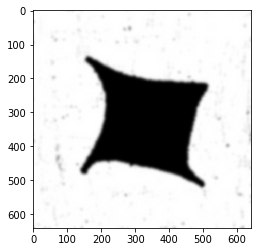

In [7]:
def g_kernel(t=1, s=5):
    filt = np.arange(np.ceil(-s*np.sqrt(t)),np.ceil(s*np.sqrt(t))+1)
    g = np.exp(-( (filt)**2 / ( 2.0 * t ) ) )/np.sqrt(t*2*np.pi)
    dg_2 = np.exp(-( (filt)**2 / ( 2.0 * t ) ) )/(np.sqrt(t*2*np.pi)*t)*(filt**2/t**2-1/t)
    return g, dg_2
g, dg_2 = g_kernel()
im_test_features = get_gauss_feat_im(im_test, 2.5)
predictions = means.predict(im_test_features.reshape((im_test_features.shape[0]*im_test_features.shape[1],15)))
labels=[]
for cluster_pred in predictions:
    if cluster_list[cluster_pred][0] >= cluster_list[cluster_pred][1]:
        labels.append(255)
    else:
        labels.append(0)
labels = np.array(labels)
#im_test_smooth = ndimage.filters.convolve1d(labels.reshape((640,640,)), dg_2, axis=0)
#im_test_smooth = ndimage.filters.convolve1d(im_test_smooth, dg_2.transpose(), axis=1)
im_test_smooth = ndimage.gaussian_filter(labels.reshape(640,640,), 4, order=0)
plt.imshow(im_test_smooth, cmap="gray")
plt.show()



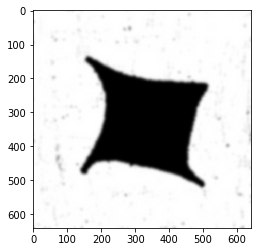

In [8]:
plt.imshow(im_test_smooth, cmap="gray")
plt.show()

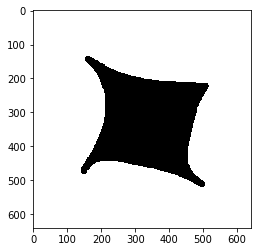

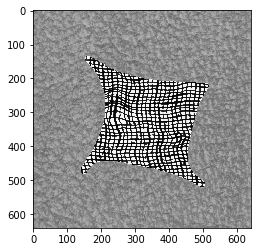

(640, 640)
(10000, 81)


In [32]:
im_train_label = cv2.imread("week_3_data/test_A_ground_truth.png", cv2.IMREAD_GRAYSCALE)
im_train_label = im_train_label.astype(float)
plt.imshow(im_train_label, cmap="gray")
plt.show()
im_train_input = cv2.imread("week_3_data/test_A_image.png", cv2.IMREAD_GRAYSCALE)
im_train_input = im_train_input.astype(float)
plt.imshow(im_train_input, cmap="gray")
plt.show()
print(im_train_label.shape)
print(im_train_input_feat.shape)

In [10]:
from sklearn.feature_extraction import image
print(im_train_input.shape)
patches = image.extract_patches_2d(im_train_input, (9, 9))
print(patches.shape)
reshape_patches = []
for i, patch in enumerate(patches):
    reshape_patches.append((patch.reshape(9*9,1)))
im_train_input_feat = np.array(reshape_patches)
print(im_train_input_feat.shape)

(640, 640)


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/image.py:287: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  indexing_strides = arr[slices].strides


(399424, 9, 9)
(399424, 81, 1)


In [35]:
from feature_based_segmentation import im2col, get_gauss_feat_im, ndim2col
im_as_col_feat = im2col(im_train_input, (9,9))
im_as_col_label = im2col(im_train_label, (9,9))
im_as_col_feat = im_as_col_feat.transpose()
im_as_col_label = im_as_col_label.transpose()
print(im_as_col_feat.shape)
print(im_as_col_label.shape)

(399424, 81)
(399424, 81)


In [36]:
im_train_input_feat, im_train_label = resample(im_as_col_feat, im_as_col_label, n_samples=10000, random_state=1)
print(im_train_label.shape)
print(im_train_input_feat.shape)
#neigh = KNeighborsClassifier(n_neighbors=10)
#neigh.fit(im_train_input_feat, im_train_label)


(10000, 81)
(10000, 81)


In [37]:
clusters=1000
means = KMeans(n_clusters=clusters)
means.fit(im_train_input_feat)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=1000, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [41]:
print(len(im_train_label[0])/2)

40.5


In [42]:
predictions = means.predict(im_train_input_feat)

cluster_list = np.zeros([clusters,2])
for i, ele in enumerate(predictions):
    label = im_train_label[i][40]
    if label == 255:
        label = 1
    cluster_list[int(ele)][int(label)] += 1
a_sum = 0
for i,row in enumerate(cluster_list):
    class_0 = row[0]
    class_1 = row[1]
    combined = class_0 + class_1
    if combined != 0:
        cluster_list[i][0] /= combined
        cluster_list[i][1] /= combined
    a_sum += class_0 + class_1
print(a_sum)
print(cluster_list)

10000.0
[[0. 1.]
 [0. 1.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


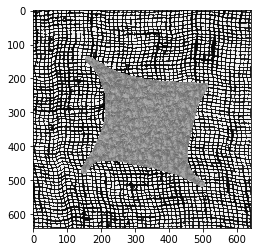

In [46]:
im_test = cv2.imread("week_3_data/train_A_image.png", cv2.IMREAD_GRAYSCALE)
im_test = im_test.astype(float)
plt.imshow(im_test, cmap="gray")
plt.show()
im_test_features = im2col(im_test, (9,9))
im_test_features = im_test_features.transpose()
predictions = means.predict(im_test_features)

[1 1 1 ... 1 1 1]


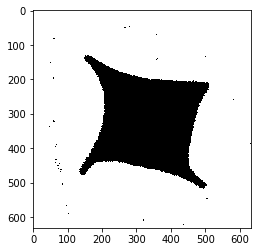

In [47]:
labels=[]
for cluster_pred in predictions:
    if cluster_list[cluster_pred][0] >= cluster_list[cluster_pred][1]:
        labels.append(1)
    else:
        labels.append(0)
labels = np.array(labels)
print(labels)
plt.imshow(labels.reshape(632,632), cmap="gray")
plt.show()